In [66]:
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [67]:
# Read the file, skipping the first row (header)
#df = pd.read_csv('./pop-edge.txt', sep='\t', skiprows=1, header=None, names=["Node1", "Node2", "Correlation"])
df = pd.read_csv('./rock_edge_list.csv')

# Create an undirected graph
G = nx.Graph()

# Add edges without weights (if you need weights, modify accordingly)
G.add_edges_from(df[['Node1', 'Node2']].values)

# Network properties
N = len(G)
L = G.size()
degrees = [G.degree(node) for node in G]

kmin = min(degrees) if degrees else 0
kmax = max(degrees) if degrees else 0

print("Number of nodes: ", N)
print("Number of edges: ", L)
print()
print("Average degree: ", 2*L/N if N > 0 else 0)
print("Average degree (alternate calculation)", np.mean(degrees) if degrees else 0)
print()
print("Minimum degree: ", kmin)
print("Maximum degree: ", kmax)

Number of nodes:  524
Number of edges:  6000

Average degree:  22.900763358778626
Average degree (alternate calculation) 22.900763358778626

Minimum degree:  1
Maximum degree:  115


In [68]:
# Get 20 logarithmically spaced bins between kmin and kmax
bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=20)

# histogram the data into these bins
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

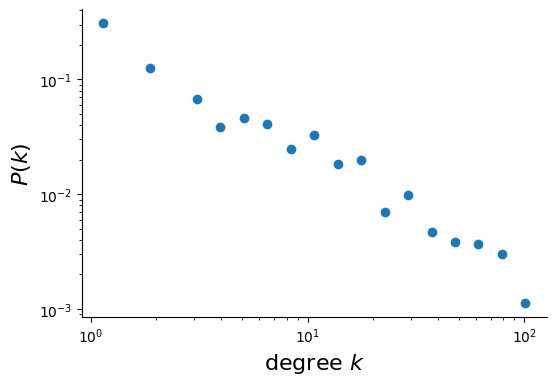

In [69]:
fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.loglog(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()

In [71]:
# Get 15 linearly spaced bins between kmin and kmax
bin_edges = np.linspace(kmin, kmax, num=15)

# histogram the data into these bins
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

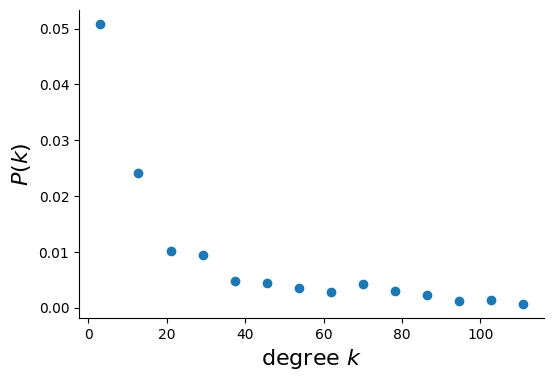

In [73]:
fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.plot(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()